In [10]:
#Load the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Plot styling
import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline
from pylab import rcParams
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


# rcParams['figure.figsize'] = 5, 10

#Read the csv file
dataset=pd.read_csv('supermarket_sales.csv')

#Explore the dataset
dataset.head()#top 5 columns
len(dataset) # of rows

#descriptive statistics of the dataset
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,2.649463e+01,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,2.458853e+02,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,6.220360e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580e+00,4.000000,5.500000,7.000000,8.500000,10.000000


Text(0.5, 0, 'Quantity / Total')

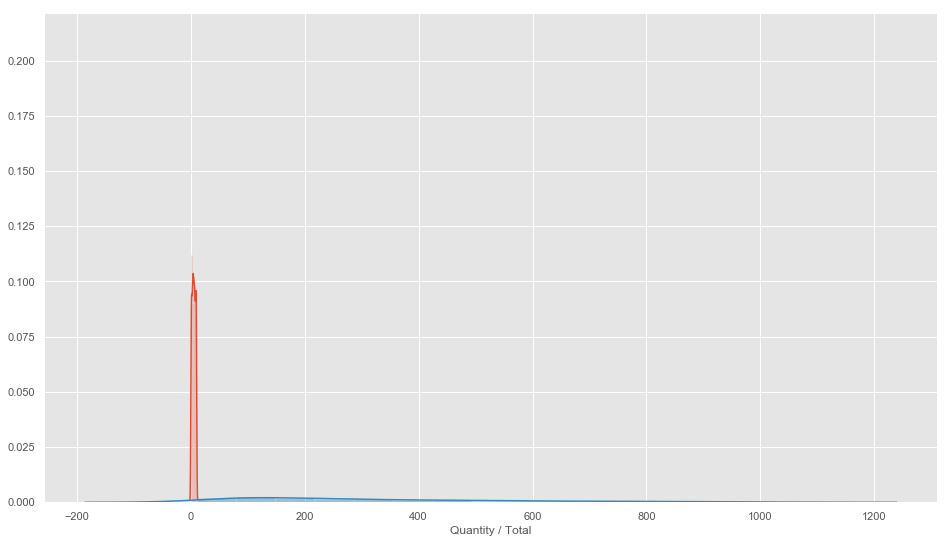

In [16]:
#Visualizing the data - displot
plot_income = sns.distplot(dataset["Quantity"])
plot_spend = sns.distplot(dataset["Total"])
plt.xlabel('Quantity / Total')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[(0, 420)]

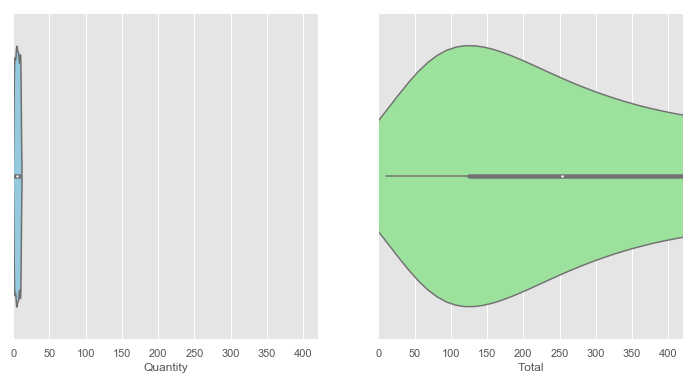

In [15]:
#Violin plot of Income and Spend
f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True, sharey=True)
v1 = sns.violinplot(data=dataset, x='Quantity', color="skyblue",ax=axes[0])
v2 = sns.violinplot(data=dataset, x='Total',color="lightgreen", ax=axes[1])
v1.set(xlim=(0,420))

In [4]:
# X = dataset["Total"].groupby(dataset['Quantity'])
X = np.column_stack((dataset["Total"],dataset["Quantity"]))
# X = X.values.reshape(-1,2)
# print(X)

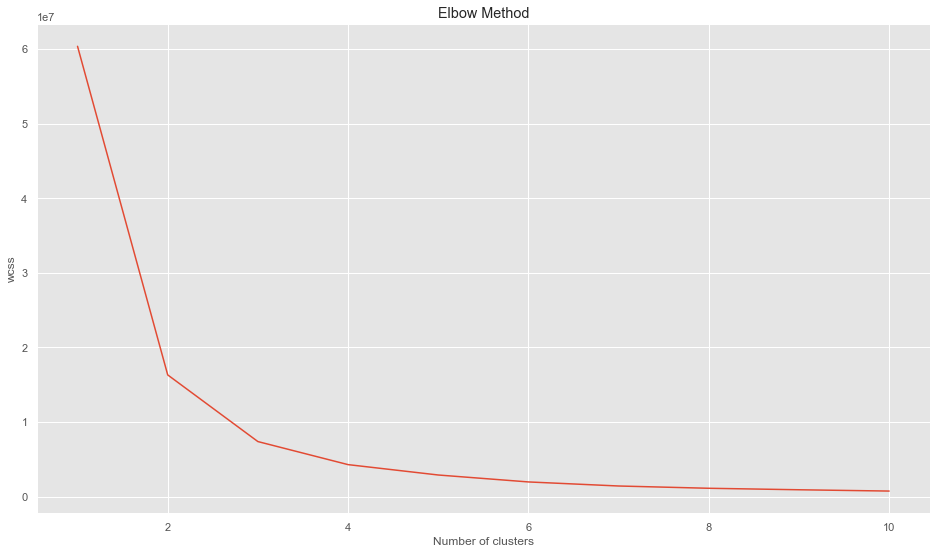

In [14]:
#Using the elbow method to find the optimum number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

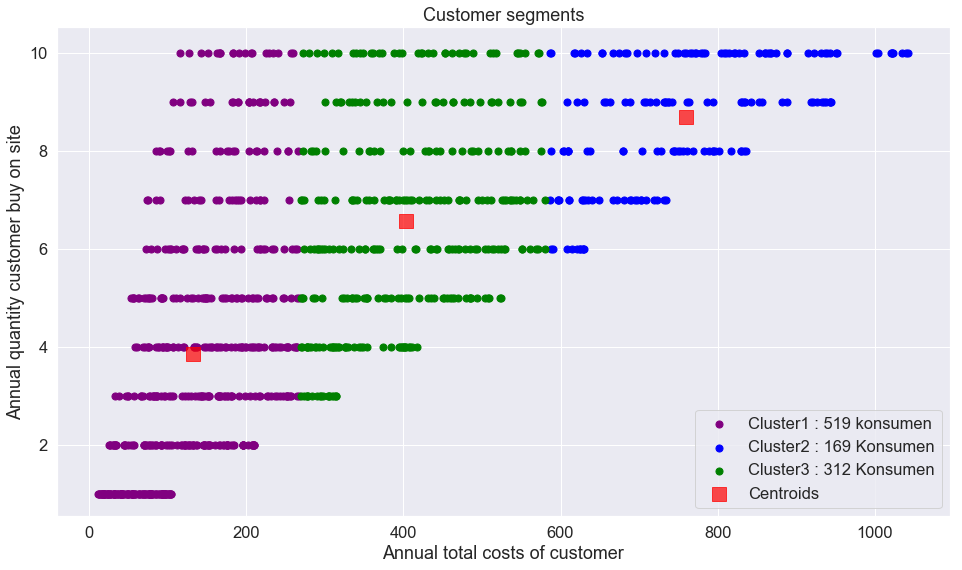

In [28]:
##Fitting kmeans to the dataset with k=4
km4=KMeans(n_clusters=3,init='k-means++', max_iter=3000, n_init=10, random_state=0)
y_means = km4.fit_predict(X)

sns.set(font_scale=1.5)
#Visualizing the clusters for k=4
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1 : 519 konsumen')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2 : 169 Konsumen')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3 : 312 Konsumen')
plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual total costs of customer')
plt.ylabel('Annual quantity customer buy on site')
plt.legend()
plt.show()

In [26]:
# from collections import Counter, defaultdict
# print(Counter(estimator.labels_))
a =[]
for i in y_means:
    a.append(i)
    
from collections import Counter, defaultdict
print(Counter(a))

Counter({0: 519, 2: 312, 1: 169})


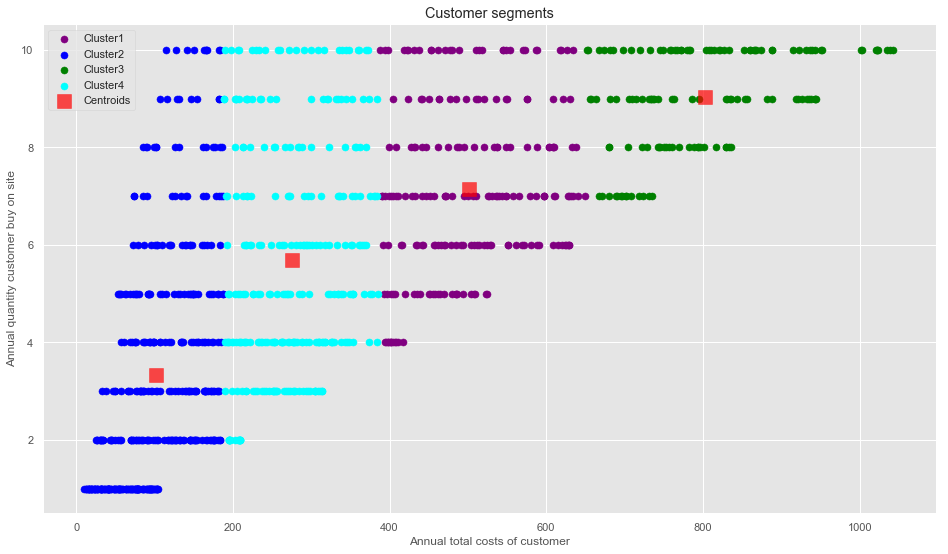

In [18]:
##Fitting kmeans to the dataset with k=4
km4=KMeans(n_clusters=4,init='k-means++', max_iter=3000, n_init=10, random_state=0)
y_means = km4.fit_predict(X)

#Visualizing the clusters for k=4
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual total costs of customer')
plt.ylabel('Annual quantity customer buy on site')
plt.legend()
plt.show()

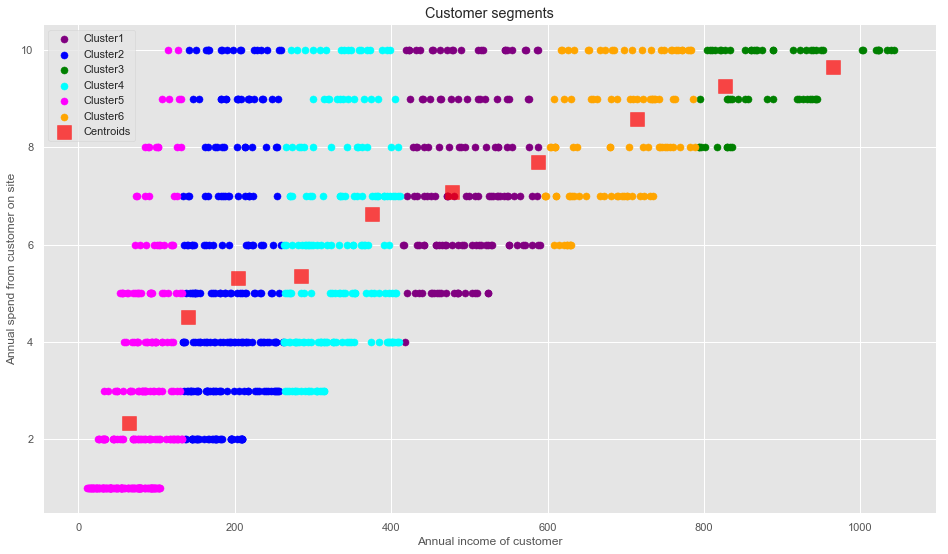

In [11]:
##Fitting kmeans to the dataset - k=6
km4=KMeans(n_clusters=6,init='k-means++', max_iter=3000, n_init=10, random_state=0)
y_means = km4.fit_predict(X)
#Visualizing the clusters
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(X[y_means==4,0],X[y_means==4,1],s=50, c='magenta',label='Cluster5')
plt.scatter(X[y_means==5,0],X[y_means==5,1],s=50, c='orange',label='Cluster6')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()